## Раздел "1.4 Использование библиотек NumPy, SciPy"

##  Практические задания

### 1. Построение распределений

Сгенерировать выборку с распределением Рэлэя ( https://ru.wikipedia.org/wiki/Распределение_Рэлея ) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib.

#### Решение

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Распределение Рэлея с параметром масштаба = 2.0
# numpy
from numpy.random import default_rng
rng = default_rng()
values_numpy = rng.rayleigh(scale=2.0, size=100000)

In [3]:
# scipy
from scipy.stats import rayleigh
values_scipy = rayleigh.rvs(scale=2.0, size=100000)

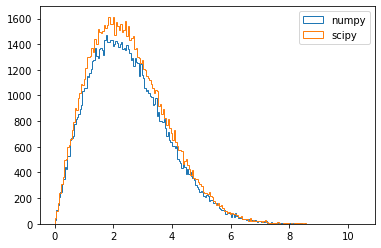

In [4]:
# Гистограмма значений
fig, ax = plt.subplots(1, 1)
_ = ax.hist(values_numpy, bins=200, histtype='step', label='numpy')
_ = ax.hist(values_scipy, bins=200, histtype='step', label='scipy')
ax.legend()
plt.show()

### 2. Построение графика на по функции

Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график.

#### Решение

Преобразуем

$$  (x^2 + y^2 - 1)^3 - x^2y^3 = 0 $$
$$ (x^2 + y^2 - 1)^3 = x^2y^3 $$
$$ x^2 + y^2 - 1 = x^{2/3}y $$
$$ y^2 - x^{2/3}y + (x^2 - 1) = 0 $$

Рассмотрим квадратное уравнение $ y^2 + by + c = 0 $  
Дискриминант уравнения равен $ D = b^2 - 4c = x^{4/3} - 4x^2 + 4 $
Найдем значения $ x $, при которых $ D >= 0 $

In [5]:
import numpy as np
from scipy.optimize import root_scalar

In [6]:
# Функция от x
def D(x):
    return (x**4)**(1/3) - 4 * x**2 + 4

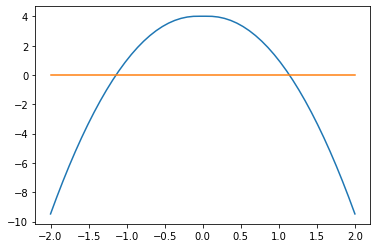

In [7]:
# График функции D
x = np.linspace(-2, 2, 50)
plt.plot(x, D(x), x, np.zeros(len(x)))
plt.show()

График функции $ D(x) $ пересекает ось $ Oy $  в двух точках, между которыми значение функции больше нуля.
Найдем эти значения.

In [8]:
x1 = root_scalar(D, bracket=[-2, 0]).root
x2 = root_scalar(D, bracket=[0, 2]).root
print([x1, x2])

[-1.1390281646861342, 1.1390281646861342]


Выразим корни уравнения $ y^2 + by + c = 0 $ как функции от $ x $.
$$ y_1 = \frac{- b + \sqrt{D}}{2} = \frac{- x^{2/3} + \sqrt{x^{4/3} - 4x^2 + 4}}{2}$$ 
$$ y_2 = \frac{- b - \sqrt{D}}{2} = \frac{- x^{2/3} - \sqrt{x^{4/3} - 4x^2 + 4}}{2}$$ 

In [9]:
# Функции от x
def y1(x):
    return ((x**2)**(1/3) + D(x)**.5) / 2
def y2(x):
    return ((x**2)**(1/3) - D(x)**.5) / 2

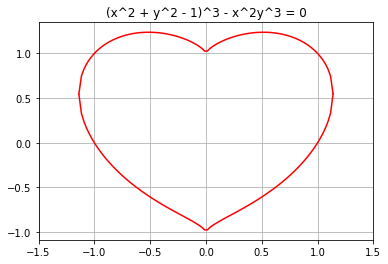

In [10]:
# Итоговый график исходной функции
x = np.linspace(x1, x2, 100)
plt.plot(x, y1(x), 'r', x, y2(x), 'r')
plt.grid(True)
plt.xlim([-1.5, 1.5])
plt.title('(x^2 + y^2 - 1)^3 - x^2y^3 = 0')
plt.show()

### 3. Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию.

Виды зависимостей:
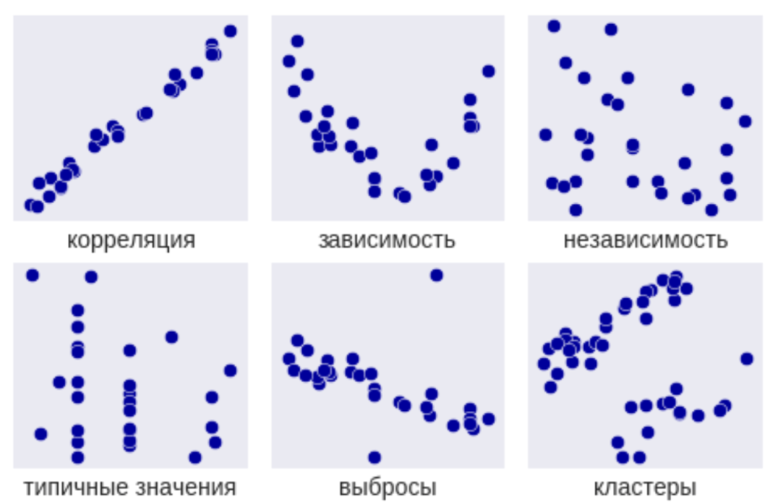

Представить в виде графиков в файле формата Notebook.

Для анализа используйте графики scatter, plot, hist, bar из matplotlib и функции numpy и scipy.

Постарайтесь не использовать pandas и др. библиотеки, не указанные ранее.

#### Решение

In [11]:
# Загрузка данных в виде списков без использования функций numpy
filename = 'dataset_home.txt'

In [12]:
rows = []
with open(filename, 'r') as file:
    for line in file:
        rows.append(line.strip().split(','))

In [13]:
# Преобразуем в numpy.ndarray 
data = np.array(rows)
data[:10, :]

array([['20', 'female', '28.975', '0', 'no', 'northwest', '2257.47525'],
       ['44', 'male', '31.35', '1', 'yes', 'northeast', '39556.4945'],
       ['47', 'female', '33.915', '3', 'no', 'northwest', '10115.00885'],
       ['26', 'female', '28.785', '0', 'no', 'northeast', '3385.39915'],
       ['19', 'female', '28.3', '0', 'yes', 'southwest', '17081.08'],
       ['52', 'female', '37.4', '0', 'no', 'southwest', '9634.538'],
       ['32', 'female', '17.765', '2', 'yes', 'northwest', '32734.1863'],
       ['57', 'male', '27.94', '1', 'no', 'southeast', '11554.2236'],
       ['59', 'male', '41.14', '1', 'yes', 'southeast', '48970.2476'],
       ['36', 'male', '28.595', '3', 'no', 'northwest', '6548.19505']],
      dtype='<U11')

Данные в файле содержат 7 столбцов (переменных) с разными типами данных.  
Для удобства анализа заменим строковые значения целыми кодами.

In [14]:
dic = {
    'female': 0,
    'male': 1,
    'no': 0,
    'yes': 1,
    'northwest': 0,
    'northeast': 1,
    'southwest': 2,
    'southeast': 3
}
for k,v in dic.items():
    data[tuple([data == k])] = v

In [15]:
data = data.astype(float)

Требуется выяснить виды зависимостей между переменными, соответствующими столбцам.  
Всего возможна 21 комбинация из 7 переменных по две. 

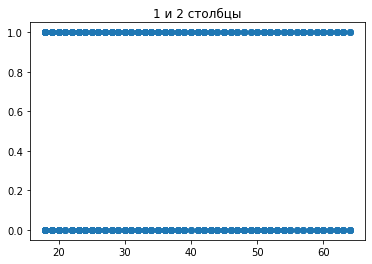

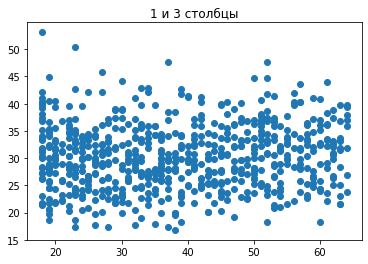

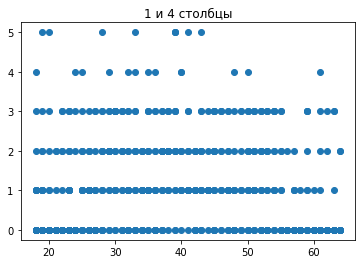

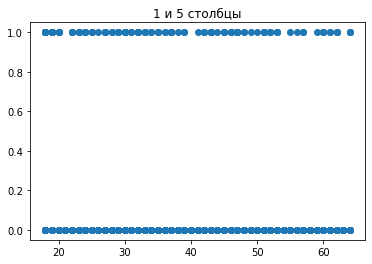

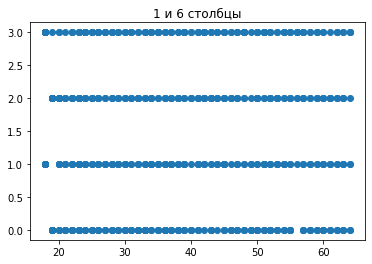

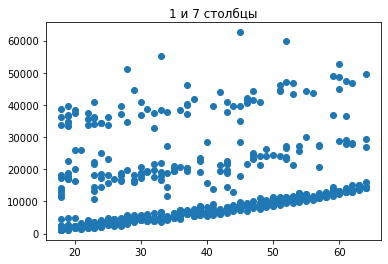

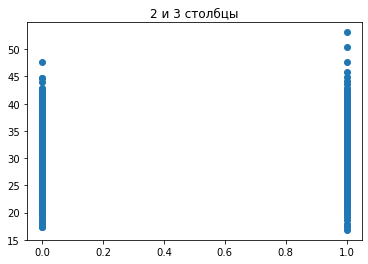

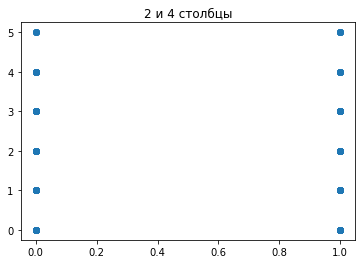

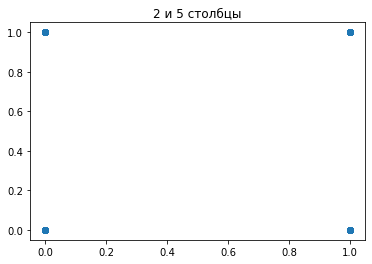

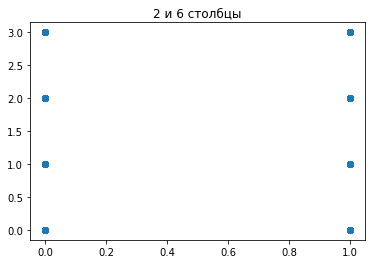

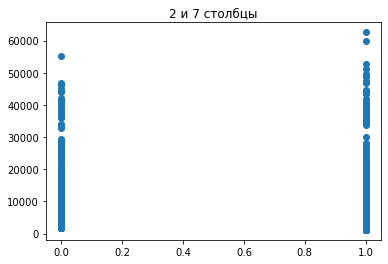

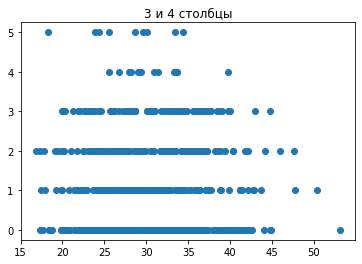

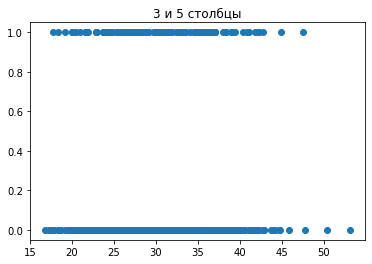

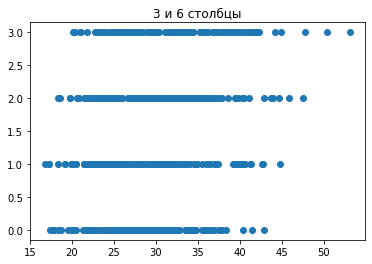

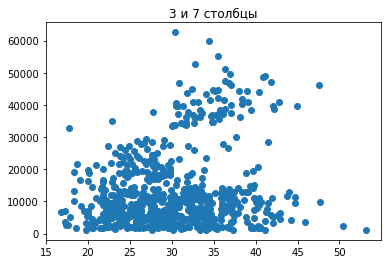

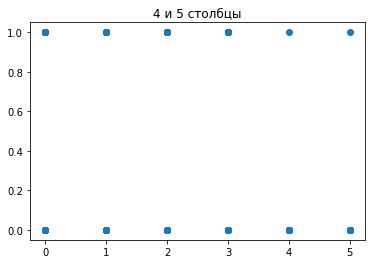

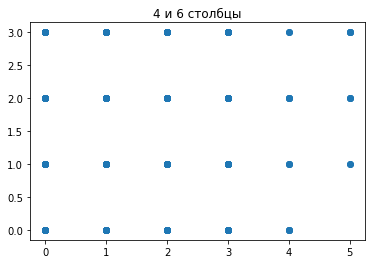

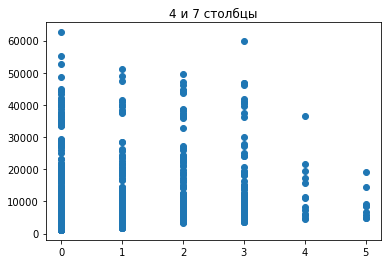

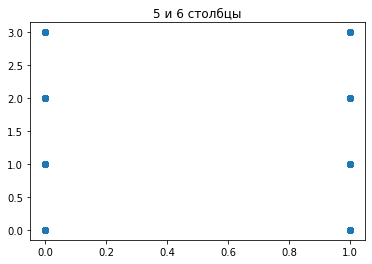

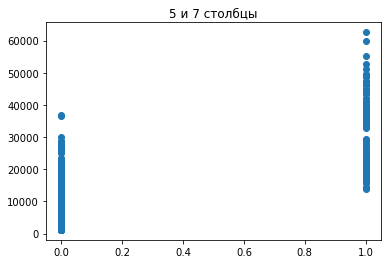

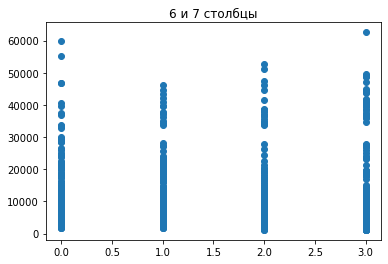

In [16]:
from itertools import combinations
for i, j in combinations(np.arange(7), 2):
    plt.scatter(data[:,i], data[:,j])
    plt.title(f'{i + 1} и {j + 1} столбцы')
    plt.show()

В основном графики похоже на вид "типичные значения".  
1 и 3 переменные - независимость.  
1 и 7 - зависимость, корреляция, выбросы.  
3 и 7 - кластеры.

Некоторые отношения нельзя увидеть на scatter, для них можно построить гистограммы. 

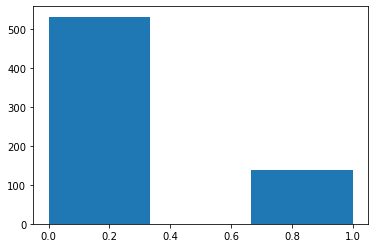

In [17]:
plt.hist(data[:, 4], bins=3)
plt.show()

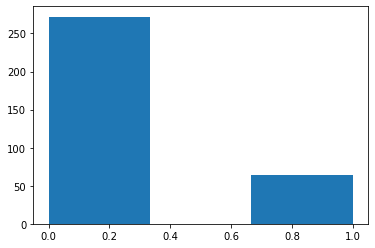

In [18]:
plt.hist(data[data[:, 1]==0, 4], bins=3)
plt.show()

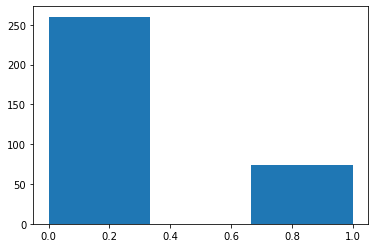

In [19]:
plt.hist(data[data[:, 1]==1, 4], bins=3)
plt.show()

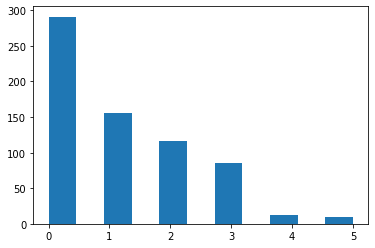

In [20]:
plt.hist(data[:, 3], bins=11)
plt.show()

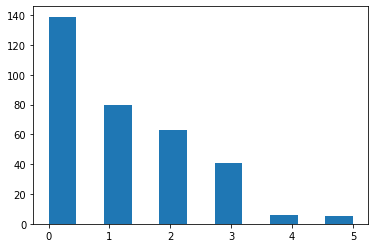

In [21]:
plt.hist(data[data[:, 1]==1, 3], bins=11)
plt.show()

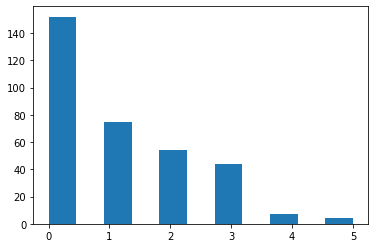

In [22]:
plt.hist(data[data[:, 1]==0, 3], bins=11)
plt.show()

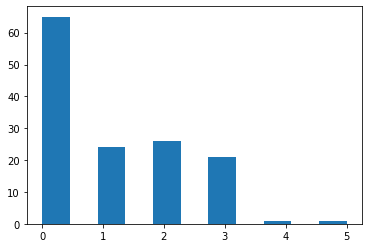

In [23]:
plt.hist(data[data[:, 4]==1, 3], bins=11)
plt.show()

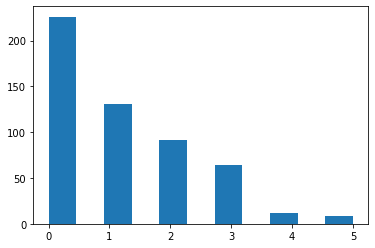

In [24]:
plt.hist(data[data[:, 4]==0, 3], bins=11)
plt.show()

2 и 5, а также 2 и 4 судя по гистограммам независимы.  
Напротив, между 4 и 5 наблюдается некоторая зависимость.